# AT3 - Data Exploration

We read in the data

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df_processed = pd.read_csv("../data/processed/df_processed.csv")

In [3]:
df_processed.head()

,startingAirport,destinationAirport,totalFare,departure_date,departure_time,cabin_type
0,OAK,ATL,193.99,2022-06-06,19:14:00,coach
1,OAK,ATL,255.58,2022-06-06,07:00:00,coach
2,OAK,ATL,304.78,2022-06-06,12:00:00,coach
3,OAK,ATL,304.78,2022-06-06,10:05:00,coach
4,OAK,ATL,304.78,2022-06-06,22:10:00,coach


In [4]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   startingAirport     object 
 1   destinationAirport  object 
 2   totalFare           float64
 3   departure_date      object 
 4   departure_time      object 
 5   cabin_type          object 
dtypes: float64(1), object(5)
memory usage: 618.9+ MB


In [7]:
# Set visualisation styles
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))

# Display basic information about the DataFrame
print("Basic Information:")
print(df_processed.info())
print("\nSummary Statistics:")
print(df_processed.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df_processed.isnull().sum())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   startingAirport     object 
 1   destinationAirport  object 
 2   totalFare           float64
 3   departure_date      object 
 4   departure_time      object 
 5   cabin_type          object 
dtypes: float64(1), object(5)
memory usage: 618.9+ MB
None

Summary Statistics:
       startingAirport destinationAirport     totalFare departure_date   
count         13519999           13519999  1.352000e+07       13519999  \
unique              16                 16           NaN             93   
top                LAX                LAX           NaN     2022-05-24   
freq           1352275            1295126           NaN         285643   
mean               NaN                NaN  3.737535e+02            NaN   
std                NaN                NaN  2.075496e+02            NaN   
min  

<Figure size 1500x1000 with 0 Axes>

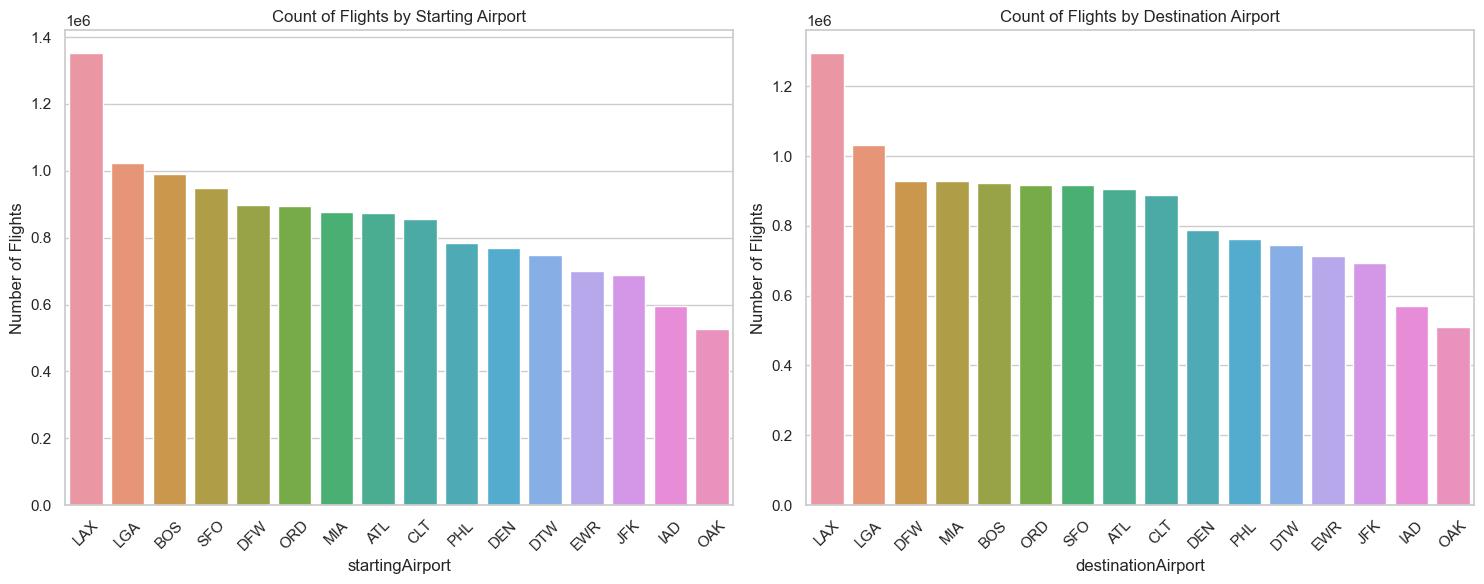

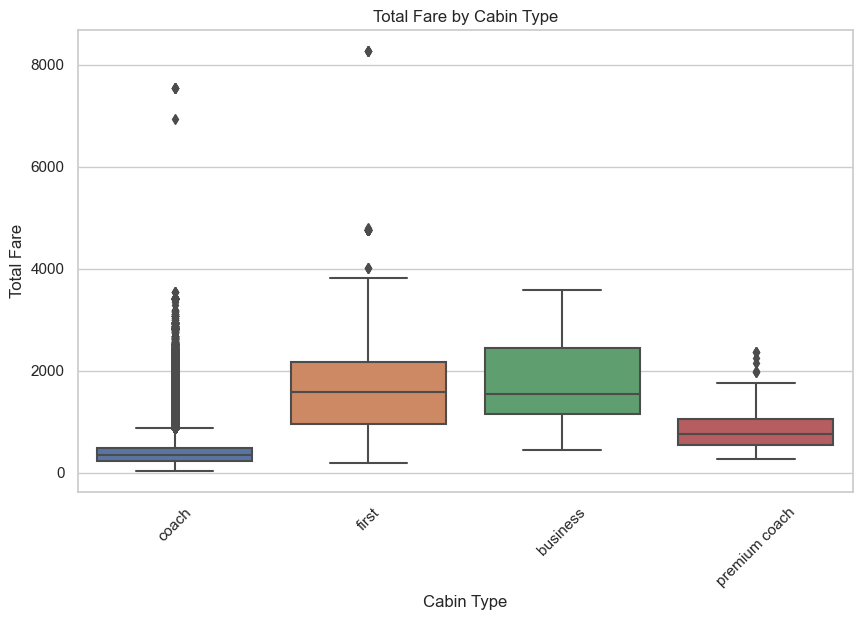

In [12]:
# Countplot for startingAirport and destinationAirport
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_processed, x='startingAirport', order=df_processed['startingAirport'].value_counts().index)
plt.title('Count of Flights by Starting Airport')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')

plt.subplot(1, 2, 2)
sns.countplot(data=df_processed, x='destinationAirport', order=df_processed['destinationAirport'].value_counts().index)
plt.title('Count of Flights by Destination Airport')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')

plt.tight_layout()
plt.show()

# Boxplot for totalFare by cabin_type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_processed, x='cabin_type', y='totalFare')
plt.title('Total Fare by Cabin Type')
plt.xlabel('Cabin Type')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.show()

In our dataset, we observe a significant class imbalance between the starting airports, with LAX having approximately 1.35 million flights and OAK only around 0.55 million. 

The boxplot analysis reveals the presence of several outliers in the dataset, particularly in the totalFare column. These outliers can significantly impact the performance and interpretability of our machine learning models. It is important to consider strategies for handling these outliers in our preprocessing steps, as they may skew the results and lead to biased predictions. We may need to explore options such as removal, transformation, or capping of outliers to ensure a robust and reliable model in later stages of our analysis.

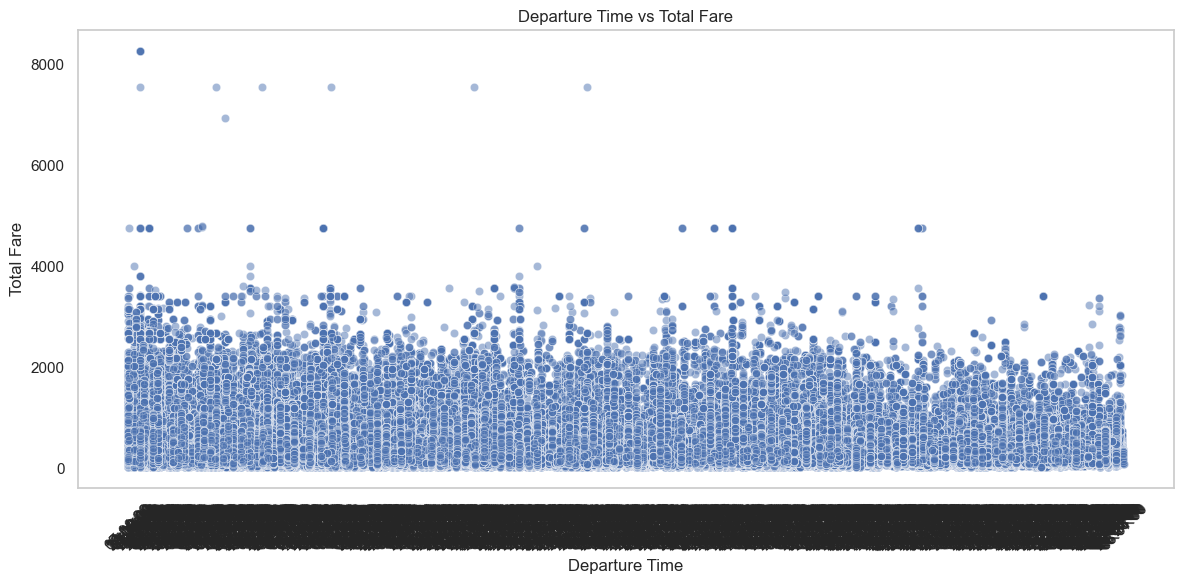

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_processed['departure_time'], y=df_processed['totalFare'], alpha=0.5)
plt.title('Departure Time vs Total Fare')
plt.xlabel('Departure Time')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.show()

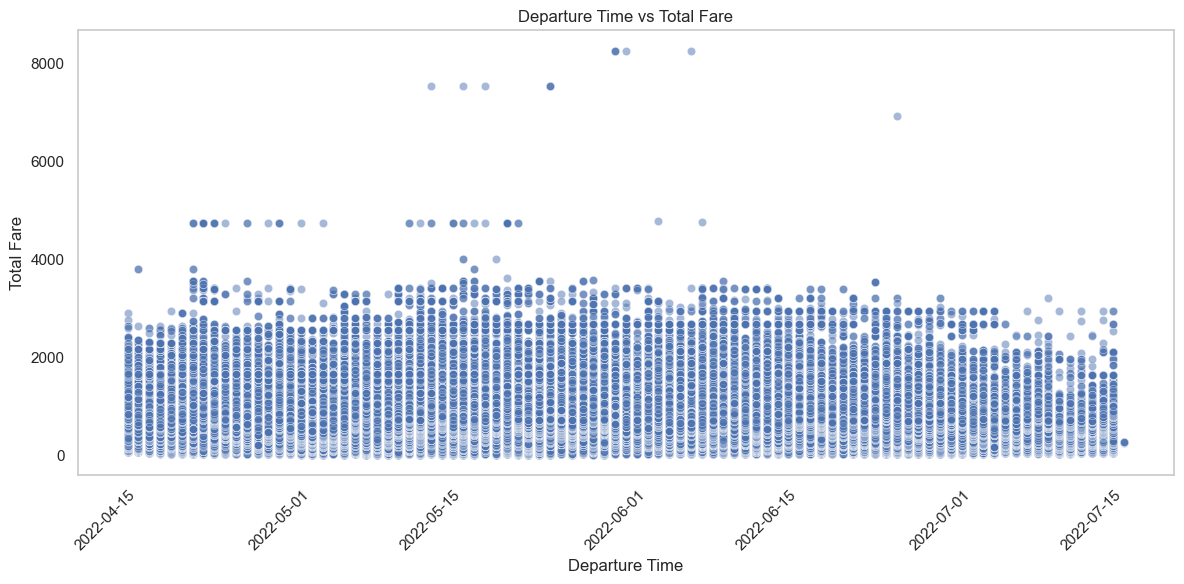

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_processed['departure_date'], y=df_processed['totalFare'], alpha=0.5)
plt.title('Departure Time vs Total Fare')
plt.xlabel('Departure Time')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.show()

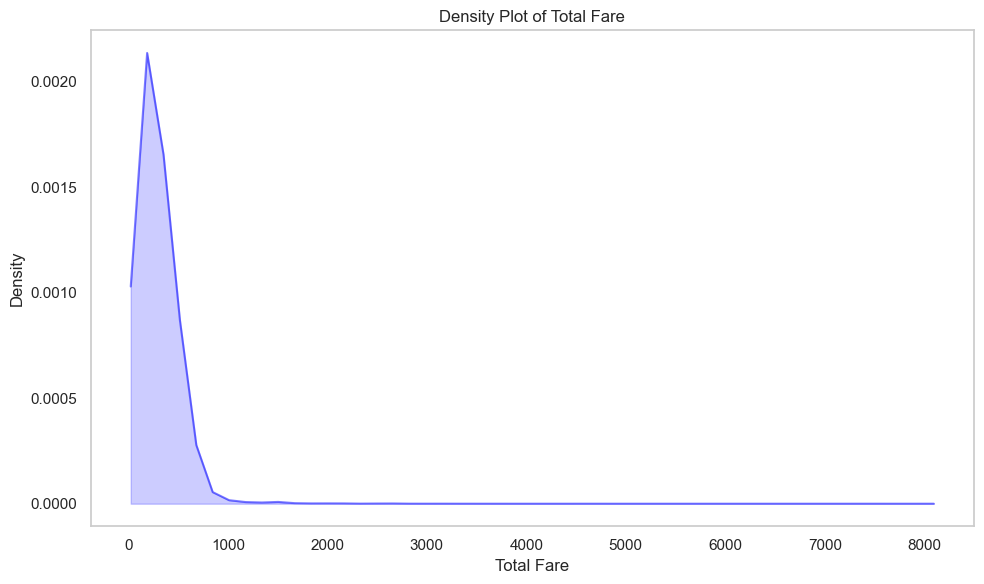

In [19]:
density = np.histogram(df_processed['totalFare'], bins=50, density=True)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the density
plt.plot(density[1][:-1], density[0], color='blue', alpha=0.5)
plt.fill_between(density[1][:-1], density[0], color='blue', alpha=0.2)

plt.title('Density Plot of Total Fare')
plt.xlabel('Total Fare')
plt.ylabel('Density')
plt.grid()
plt.tight_layout()
plt.show()

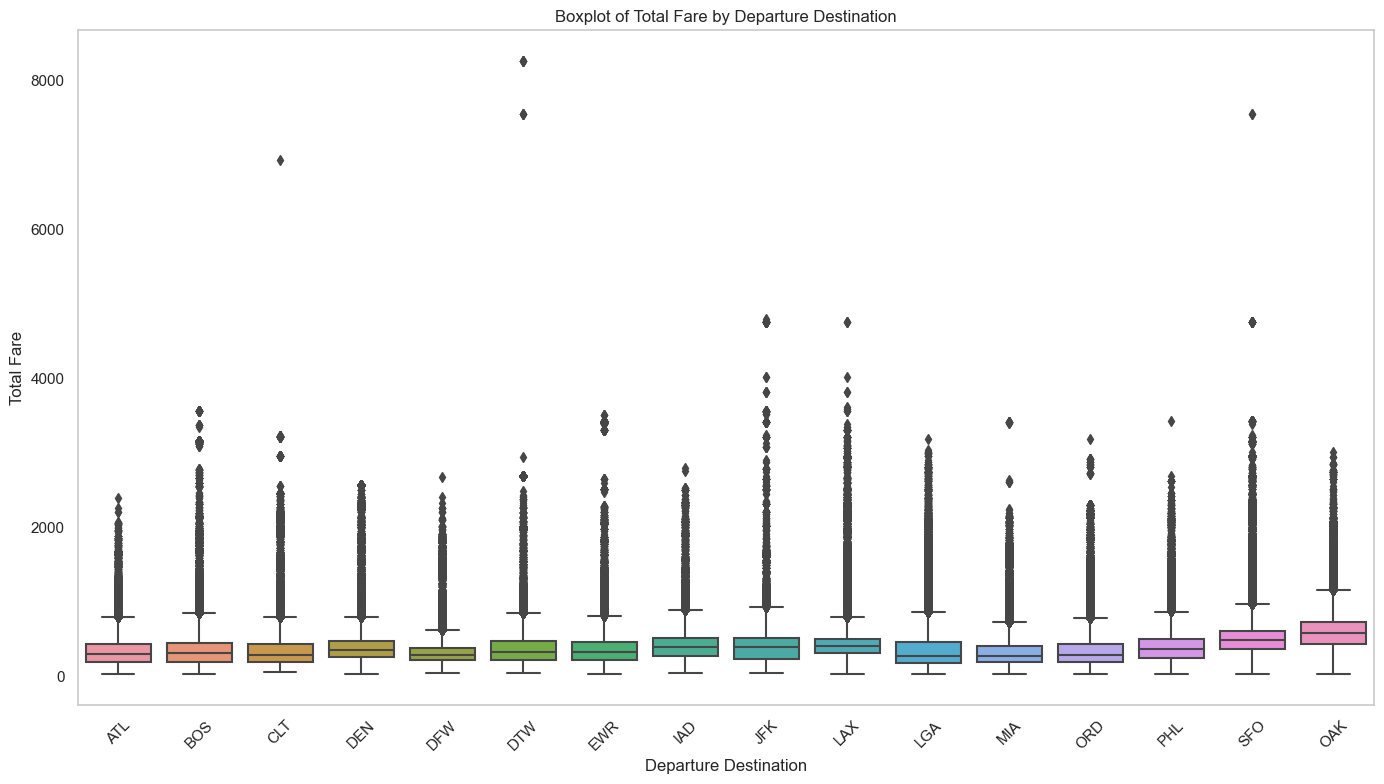

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='destinationAirport', y='totalFare', data=df_processed)
plt.title('Boxplot of Total Fare by Departure Destination')
plt.xlabel('Departure Destination')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

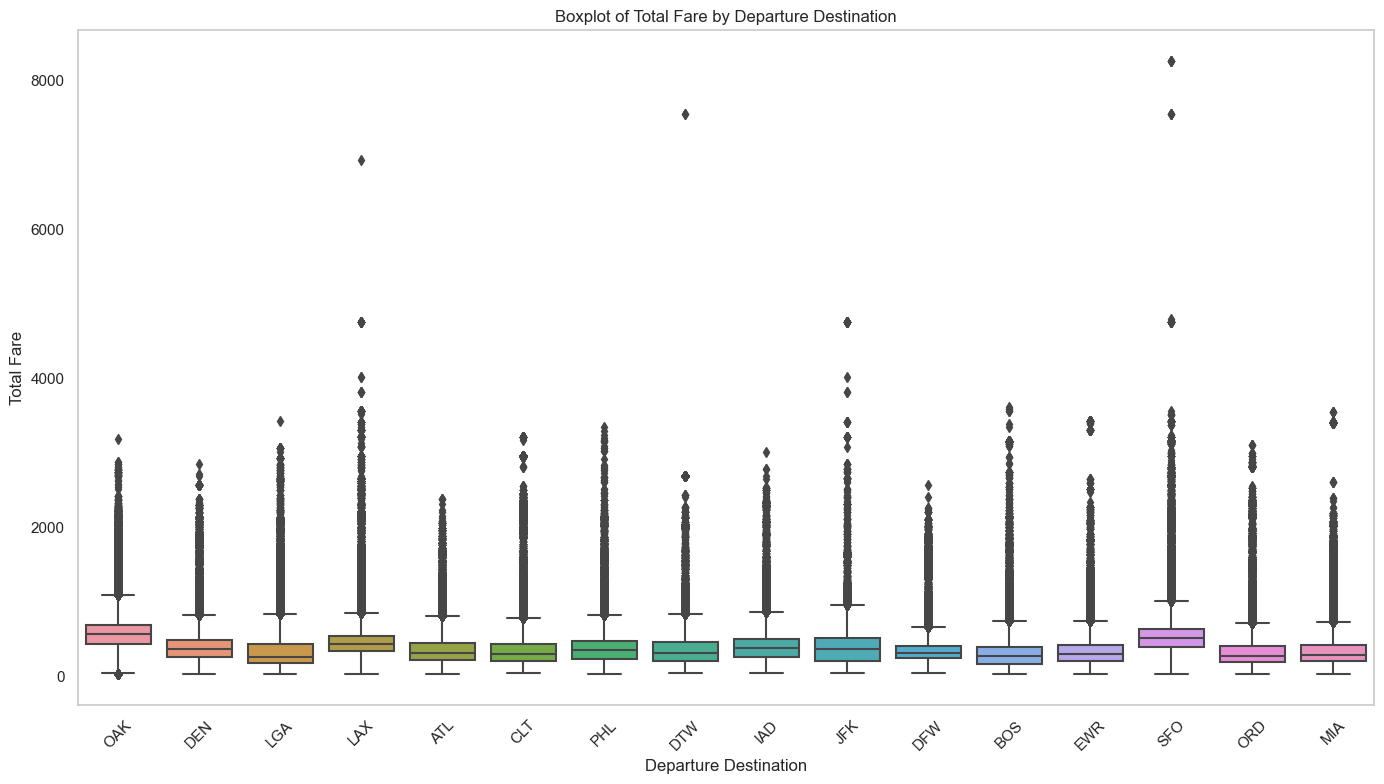

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='startingAirport', y='totalFare', data=df_processed)
plt.title('Boxplot of Total Fare by Departure Destination')
plt.xlabel('Departure Destination')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [30]:
exact_duplicates = df_processed.head(100).duplicated(keep=False)  # Keep all duplicates

# Print the number of exact duplicate rows
print(f'Number of exact duplicate rows: {exact_duplicates.sum()}')

Number of exact duplicate rows: 28


In [32]:
if exact_duplicates.sum() > 0:
    print('Exact duplicate rows:')
    print(df_processed.head(100)[exact_duplicates])

Exact duplicate rows:
   startingAirport destinationAirport  totalFare departure_date   
7              OAK                ATL     460.70     2022-06-06  \
8              OAK                ATL     460.70     2022-06-06   
9              OAK                ATL     462.70     2022-06-06   
10             OAK                ATL     462.70     2022-06-06   
24             OAK                ATL     762.70     2022-06-06   
25             OAK                ATL     762.70     2022-06-06   
26             OAK                ATL     767.10     2022-06-06   
27             OAK                ATL     767.10     2022-06-06   
39             OAK                BOS     601.71     2022-06-06   
40             OAK                BOS     601.71     2022-06-06   
49             OAK                CLT     587.10     2022-06-06   
50             OAK                CLT     587.10     2022-06-06   
53             OAK                CLT     717.10     2022-06-06   
54             OAK                CLT   

In [33]:
df_new = df_processed.drop_duplicates()

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4476555 entries, 0 to 13519996
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   startingAirport     object        
 1   destinationAirport  object        
 2   totalFare           float64       
 3   departure_date      datetime64[ns]
 4   departure_time      object        
 5   cabin_type          object        
 6   year                int32         
 7   month               int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 273.2+ MB


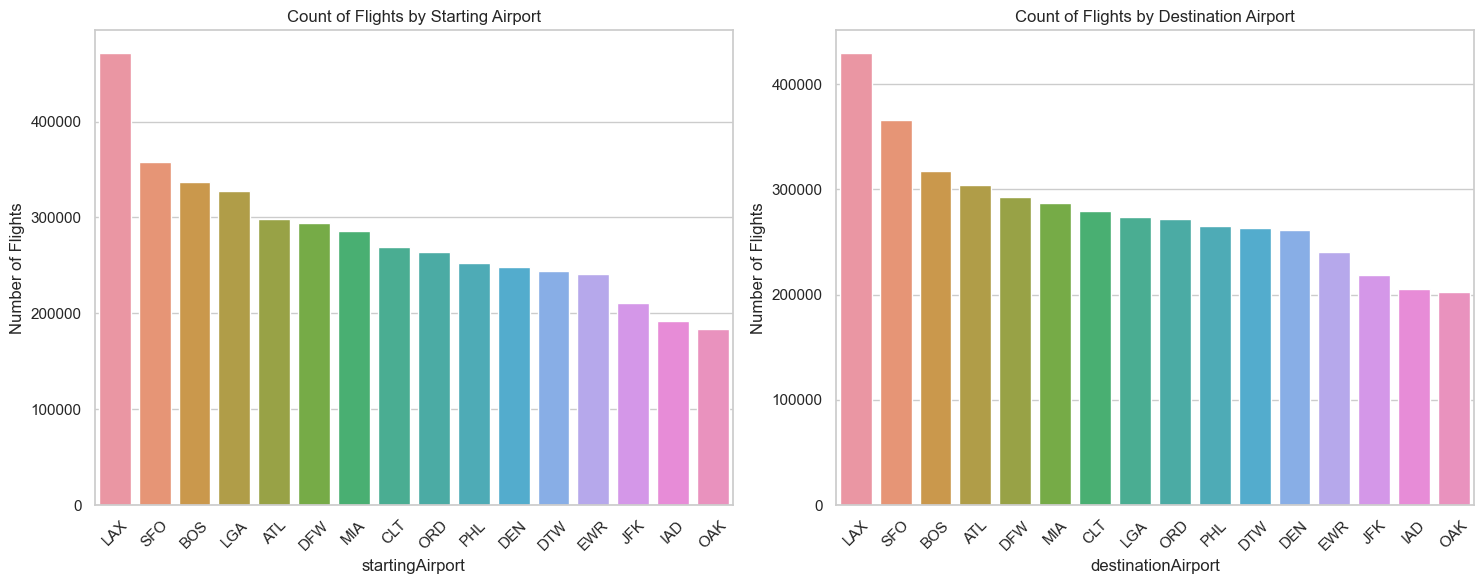

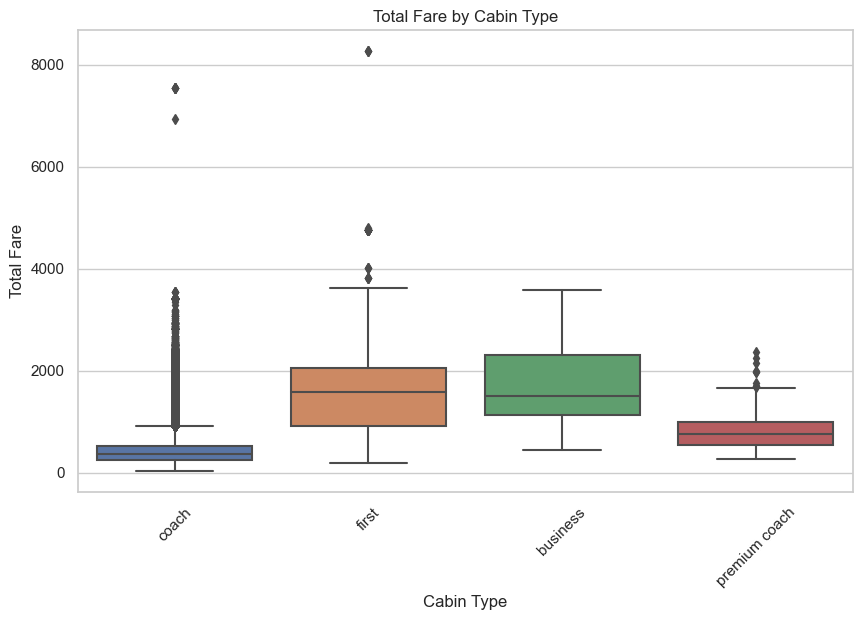

In [36]:
# Countplot for startingAirport and destinationAirport
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_new, x='startingAirport', order=df_new['startingAirport'].value_counts().index)
plt.title('Count of Flights by Starting Airport')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')

plt.subplot(1, 2, 2)
sns.countplot(data=df_new, x='destinationAirport', order=df_new['destinationAirport'].value_counts().index)
plt.title('Count of Flights by Destination Airport')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')

plt.tight_layout()
plt.show()

# Boxplot for totalFare by cabin_type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='cabin_type', y='totalFare')
plt.title('Total Fare by Cabin Type')
plt.xlabel('Cabin Type')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.show()

In [37]:
df_new.head()

,startingAirport,destinationAirport,totalFare,departure_date,departure_time,cabin_type,year,month
0,OAK,ATL,193.99,2022-06-06,19:14:00,coach,2022,6
1,OAK,ATL,255.58,2022-06-06,07:00:00,coach,2022,6
2,OAK,ATL,304.78,2022-06-06,12:00:00,coach,2022,6
3,OAK,ATL,304.78,2022-06-06,10:05:00,coach,2022,6
4,OAK,ATL,304.78,2022-06-06,22:10:00,coach,2022,6


In [38]:
df_new['day'] = pd.to_datetime(df_new['departure_date']).dt.day
df_new['hour'] = pd.to_datetime(df_new['departure_time']).dt.hour
df_new['minute'] = pd.to_datetime(df_new['departure_time']).dt.minute

# Drop the original departure_date and departure_time columns
df_new = df_new.drop(columns=['departure_date', 'departure_time'])

/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_28928/3962948619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['day'] = pd.to_datetime(df_new['departure_date']).dt.day
/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_28928/3962948619.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new['hour'] = pd.to_datetime(df_new['departure_time']).dt.hour
/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_28928/3962948619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [39]:
df_new

,startingAirport,destinationAirport,totalFare,cabin_type,year,month,day,hour,minute
0,OAK,ATL,193.99,coach,2022,6,6,19,14
1,OAK,ATL,255.58,coach,2022,6,6,7,0
2,OAK,ATL,304.78,coach,2022,6,6,12,0
3,OAK,ATL,304.78,coach,2022,6,6,10,5
4,OAK,ATL,304.78,coach,2022,6,6,22,10
...,...,...,...,...,...,...,...,...,...
13519984,MIA,DTW,207.60,coach,2022,5,10,19,0
13519985,MIA,DTW,207.60,coach,2022,5,10,6,30
13519986,MIA,DTW,207.60,coach,2022,5,10,18,4
13519992,MIA,DTW,266.10,coach,2022,5,10,14,58


In [40]:
df_new.to_csv('../data/processed/df_processed_final.csv', index=False)

In [44]:
df_new['departure_datetime'] = pd.to_datetime(
    df_new[['year', 'month', 'day', 'hour', 'minute']]
)

# Sort the DataFrame by the new datetime column
df_new = df_new.sort_values(by='departure_datetime')

# Split into train and temp (temp will be used for validation and test)
train_size = 0.7  # 70% for training
X_train, temp_set = train_test_split(df_new, train_size=train_size, shuffle=False)

# Further split the temp set into validation and test sets
val_size = 0.5  # 50% of the temp set for validation (which is 15% of the original data)
X_val, X_test = train_test_split(temp_set, train_size=val_size, shuffle=False)

# Separate features and target variable
y_train = X_train['totalFare']
y_val = X_val['totalFare']
y_test = X_test['totalFare']

# Drop target variable from feature sets
X_train = X_train.drop(columns=['totalFare', 'departure_datetime'])
X_val = X_val.drop(columns=['totalFare', 'departure_datetime'])
X_test = X_test.drop(columns=['totalFare', 'departure_datetime'])

# Display the shapes of the resulting sets
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (3133588, 8), Validation set: (671483, 8), Test set: (671484, 8)


In [45]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [46]:
X_train.head()

,startingAirport,destinationAirport,cabin_type,year,month,day,hour,minute
3532233,LAX,PHL,coach,2022,4,17,0,4
3531560,LAX,BOS,coach,2022,4,17,0,4
3531727,LAX,DFW,coach,2022,4,17,0,4
3532038,LAX,LGA,coach,2022,4,17,0,4
3531405,LAX,ATL,coach,2022,4,17,0,4
